# Evaluation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## Select only data from 32 Threads executions

In [ ]:
df = pd.read_csv ('output.csv', sep=';')

In [ ]:
df32 = df[df.nThreads.eq(32)]

## Extract mean and st deviation

In [ ]:
file_name_list = df32.fileName.unique()
ordering_type_list = df32.orderingType.unique()
summary_values_df32 = pd.DataFrame(columns=["modelName", "orderType", "sorting", "sizeMean", "sizeStd", "timeMean", "timeStd"])

for fileName in file_name_list:
    filtered_df_on_name = df32[df32.fileName.eq(fileName)]
    for orderType in ordering_type_list:
        filtered_df_on_ord_type = filtered_df_on_name[filtered_df_on_name.orderingType.eq(orderType)]
        
        # With sorting
        filtered_df_on_ord_type2 = filtered_df_on_ord_type[filtered_df_on_ord_type.isSortingEnabled.eq(True)]
        if filtered_df_on_ord_type2.shape[0] > 0:
            print(fileName.split('/')[-1] + ";" + orderType + ";" + "W ORDER; $" + \
                  str('{:0,.0f}'.format(round(filtered_df_on_ord_type2.groupby('fileName')['size'].mean()[0],0))) + " \pm " + \
                  str('{:0,.0f}'.format(round(filtered_df_on_ord_type2.groupby('fileName')['size'].std()[0],0))) + "$ & $" + \
                  str('{:0,.0f}'.format(round(filtered_df_on_ord_type2.groupby('fileName')['time'].mean()[0],0))) + " \pm " + \
                  str('{:0,.0f}'.format(round(filtered_df_on_ord_type2.groupby('fileName')['time'].std()[0],0))) + "$")
            
            summary_values_df32 = summary_values_df32.append({
                  "modelName": fileName.split('/')[-1],
                  "orderType":  orderType,
                  "sorting":  "W ORDER",
                  "sizeMean":  filtered_df_on_ord_type2.groupby('fileName')['size'].mean()[0],
                  "sizeStd":  filtered_df_on_ord_type2.groupby('fileName')['size'].std()[0],
                  "timeMean":  filtered_df_on_ord_type2.groupby('fileName')['time'].mean()[0],
                  "timeStd":  filtered_df_on_ord_type2.groupby('fileName')['time'].std()[0]
                  }, ignore_index=True)
        
        # Without sorting
        filtered_df_on_ord_type2 = filtered_df_on_ord_type[filtered_df_on_ord_type.isSortingEnabled.eq(False)]
        if filtered_df_on_ord_type2.shape[0] > 0:
            print(fileName.split('/')[-1] + ";" + orderType + ";" + "WO ORDER; $" + \
                  str('{:0,.0f}'.format(round(filtered_df_on_ord_type2.groupby('fileName')['size'].mean()[0],0))) + " \pm " + \
                  str('{:0,.0f}'.format(round(filtered_df_on_ord_type2.groupby('fileName')['size'].std()[0],0))) + "$ & $" + \
                  str('{:0,.0f}'.format(round(filtered_df_on_ord_type2.groupby('fileName')['time'].mean()[0],0))) + " \pm " + \
                  str('{:0,.0f}'.format(round(filtered_df_on_ord_type2.groupby('fileName')['time'].std()[0],0))) + "$")
            
            summary_values_df32 = summary_values_df32.append({
                  "modelName": fileName.split('/')[-1],
                  "orderType":  orderType,
                  "sorting":  "WO ORDER",
                  "sizeMean":  filtered_df_on_ord_type2.groupby('fileName')['size'].mean()[0],
                  "sizeStd":  filtered_df_on_ord_type2.groupby('fileName')['size'].std()[0],
                  "timeMean":  filtered_df_on_ord_type2.groupby('fileName')['time'].mean()[0],
                  "timeStd":  filtered_df_on_ord_type2.groupby('fileName')['time'].std()[0]
                  }, ignore_index=True)

ADD_BOOLC_1.ctw;AS_DECLARED;W ORDER; $47 \pm 2$ & $1,982 \pm 100$
ADD_BOOLC_1.ctw;AS_DECLARED;WO ORDER; $44 \pm 2$ & $2,418 \pm 799$
ADD_BOOLC_1.ctw;IN_ORDER_SIZE_DESC;W ORDER; $47 \pm 1$ & $1,979 \pm 133$
ADD_BOOLC_1.ctw;IN_ORDER_SIZE_DESC;WO ORDER; $46 \pm 2$ & $1,935 \pm 32$
ADD_BOOLC_1.ctw;IN_ORDER_SIZE_ASC;W ORDER; $48 \pm 2$ & $1,952 \pm 78$
ADD_BOOLC_1.ctw;IN_ORDER_SIZE_ASC;WO ORDER; $44 \pm 1$ & $1,951 \pm 76$
ADD_BOOLC_1.ctw;RANDOM;W ORDER; $48 \pm 1$ & $1,886 \pm 46$
ADD_BOOLC_1.ctw;RANDOM;WO ORDER; $44 \pm 1$ & $1,936 \pm 97$
UNIFORM_ALL_1.ctw;AS_DECLARED;W ORDER; $867 \pm 17$ & $31,200 \pm 909$
UNIFORM_ALL_1.ctw;AS_DECLARED;WO ORDER; $1,003 \pm 24$ & $35,936 \pm 1,189$
UNIFORM_ALL_1.ctw;IN_ORDER_SIZE_DESC;W ORDER; $867 \pm 13$ & $31,620 \pm 914$
UNIFORM_ALL_1.ctw;IN_ORDER_SIZE_DESC;WO ORDER; $986 \pm 18$ & $34,332 \pm 922$
UNIFORM_ALL_1.ctw;IN_ORDER_SIZE_ASC;W ORDER; $868 \pm 12$ & $30,669 \pm 711$
UNIFORM_ALL_1.ctw;IN_ORDER_SIZE_ASC;WO ORDER; $984 \pm 10$ & $35,056 \pm 1,0

ADD_NUMC_1.ctw;IN_ORDER_SIZE_DESC;WO ORDER; $4,466 \pm 23$ & $55,195 \pm 1,048$
ADD_NUMC_1.ctw;IN_ORDER_SIZE_ASC;W ORDER; $4,433 \pm 25$ & $79,393 \pm 878$
ADD_NUMC_1.ctw;IN_ORDER_SIZE_ASC;WO ORDER; $4,460 \pm 16$ & $54,753 \pm 588$
ADD_NUMC_1.ctw;RANDOM;W ORDER; $4,424 \pm 25$ & $79,270 \pm 821$
ADD_NUMC_1.ctw;RANDOM;WO ORDER; $4,464 \pm 23$ & $54,649 \pm 653$
UNIFORM_BOOLEAN_1.ctw;AS_DECLARED;W ORDER; $10 \pm 1$ & $4 \pm 1$
UNIFORM_BOOLEAN_1.ctw;AS_DECLARED;WO ORDER; $11 \pm 1$ & $4 \pm 1$
UNIFORM_BOOLEAN_1.ctw;IN_ORDER_SIZE_DESC;W ORDER; $11 \pm 1$ & $5 \pm 1$
UNIFORM_BOOLEAN_1.ctw;IN_ORDER_SIZE_DESC;WO ORDER; $10 \pm 0$ & $5 \pm 1$
UNIFORM_BOOLEAN_1.ctw;IN_ORDER_SIZE_ASC;W ORDER; $10 \pm 1$ & $5 \pm 0$
UNIFORM_BOOLEAN_1.ctw;IN_ORDER_SIZE_ASC;WO ORDER; $11 \pm 0$ & $5 \pm 1$
UNIFORM_BOOLEAN_1.ctw;RANDOM;W ORDER; $10 \pm 1$ & $5 \pm 0$
UNIFORM_BOOLEAN_1.ctw;RANDOM;WO ORDER; $11 \pm 1$ & $5 \pm 1$
ADD_BOOLC_0.ctw;AS_DECLARED;W ORDER; $46 \pm 2$ & $2,018 \pm 129$
ADD_BOOLC_0.ctw;AS_DEC

## RQ1: Impact of solver type

### Impact on time

Text(0, 0.5, 'Generation time [ms]')

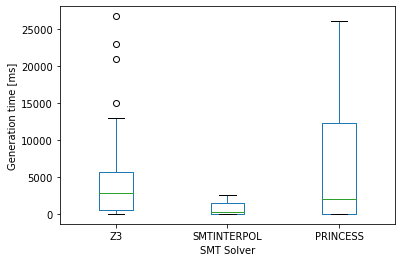

In [ ]:
dfsolver = pd.read_csv ('output_solvers.csv', sep=';')

summary_values_time_solver = pd.DataFrame(columns=["Z3", "SMTINTERPOL", "PRINCESS"])
summary_values_size_solver = pd.DataFrame(columns=["Z3", "SMTINTERPOL", "PRINCESS"])

summary_values_time_solver.loc[:,'Z3'] = dfsolver[dfsolver.solver.eq('Z3')]['time'].to_numpy().tolist()
summary_values_time_solver.loc[:,'SMTINTERPOL'] = dfsolver[dfsolver.solver.eq('SMTINTERPOL')]['time'].to_numpy().tolist()
summary_values_time_solver.loc[:,'PRINCESS'] = dfsolver[dfsolver.solver.eq('PRINCESS')]['time'].to_numpy().tolist()

boxplot = remove_outlier(remove_outlier(summary_values_time_solver,'Z3'), 'SMTINTERPOL').boxplot(column=["Z3", "SMTINTERPOL", "PRINCESS"], grid=False)  

boxplot.set_xlabel("SMT Solver")
boxplot.set_ylabel("Generation time [ms]")

### Impact on size

Text(0, 0.5, 'Test suite size')

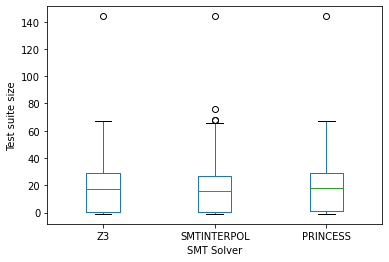

In [ ]:
summary_values_size_solver.loc[:,'Z3'] = dfsolver[dfsolver.solver.eq('Z3')]['size'].to_numpy().tolist()
summary_values_size_solver.loc[:,'SMTINTERPOL'] = dfsolver[dfsolver.solver.eq('SMTINTERPOL')]['size'].to_numpy().tolist()
summary_values_size_solver.loc[:,'PRINCESS'] = dfsolver[dfsolver.solver.eq('PRINCESS')]['size'].to_numpy().tolist()

boxplot = remove_outlier(remove_outlier(summary_values_size_solver,'PRINCESS'), 'SMTINTERPOL').boxplot(column=["Z3", "SMTINTERPOL", "PRINCESS"], grid=False)  
boxplot.set_xlabel("SMT Solver")
boxplot.set_ylabel("Test suite size")

## RQ2: Test for the impact of the order of the parameters

### Impact on size

In [8]:
as_declared = df32.loc[df32['orderingType'] == 'AS_DECLARED', 'size'].to_numpy()
in_order_size_desc = df32.loc[df32['orderingType'] == 'IN_ORDER_SIZE_DESC', 'size'].to_numpy()
in_order_size_asc = df32.loc[df32['orderingType'] == 'IN_ORDER_SIZE_ASC', 'size'].to_numpy()
random = df32.loc[df32['orderingType'] == 'RANDOM', 'size'].to_numpy()
st.ttest_rel(a=as_declared, b=in_order_size_desc)
st.wilcoxon(a=as_declared, b=in_order_size_desc)

Ttest_relResult(statistic=-0.9739007026857806, pvalue=0.33049896559592473)

In [9]:
st.ttest_rel(a=as_declared, b=in_order_size_asc)
st.wilcoxon(a=as_declared, b=in_order_size_asc)

Ttest_relResult(statistic=-4.004276994545517, pvalue=7.002361831419908e-05)

In [10]:
st.ttest_rel(a=as_declared, b=random)
st.wilcoxon(a=as_declared, b=random)

Ttest_relResult(statistic=-3.455912178574076, pvalue=0.000587248375506362)

In [11]:
st.ttest_rel(a=in_order_size_desc, b=in_order_size_asc)
st.wilcoxon(a=in_order_size_desc, b=in_order_size_asc)

Ttest_relResult(statistic=-3.5776293698104467, pvalue=0.000374752630016079)

In [12]:
st.ttest_rel(a=in_order_size_desc, b=random)
st.wilcoxon(a=in_order_size_desc, b=random)

Ttest_relResult(statistic=-2.66008656509135, pvalue=0.008021231399544785)

In [13]:
st.ttest_rel(a=in_order_size_asc, b=random)
st.wilcoxon(a=in_order_size_asc, b=random)

Ttest_relResult(statistic=1.3101307359609187, pvalue=0.19065379073508146)

In [14]:
print (np.mean(as_declared))
print (np.mean(in_order_size_desc))
print (np.mean(in_order_size_asc))
print (np.mean(random))

731.6166666666667
732.1483333333333
734.7766666666666
733.9433333333334


### Impact on time

In [15]:
as_declared = df32.loc[df32['orderingType'] == 'AS_DECLARED', 'time'].to_numpy()
in_order_size_desc = df32.loc[df32['orderingType'] == 'IN_ORDER_SIZE_DESC', 'time'].to_numpy()
in_order_size_asc = df32.loc[df32['orderingType'] == 'IN_ORDER_SIZE_ASC', 'time'].to_numpy()
random = df32.loc[df32['orderingType'] == 'RANDOM', 'time'].to_numpy()
st.ttest_rel(a=as_declared, b=in_order_size_desc)

Ttest_relResult(statistic=0.46096311377187726, pvalue=0.6449923890261806)

In [16]:
st.ttest_rel(a=as_declared, b=in_order_size_asc)

Ttest_relResult(statistic=0.809277459199439, pvalue=0.41867690520749234)

In [17]:
st.ttest_rel(a=as_declared, b=random)

Ttest_relResult(statistic=-0.9204610323776221, pvalue=0.35770242779921657)

In [18]:
st.ttest_rel(a=in_order_size_desc, b=in_order_size_asc)

Ttest_relResult(statistic=0.29527426229627235, pvalue=0.7678866945314151)

In [19]:
st.ttest_rel(a=in_order_size_desc, b=random)

Ttest_relResult(statistic=-1.4680002368484895, pvalue=0.14262904891063985)

In [20]:
st.ttest_rel(a=in_order_size_asc, b=random)

Ttest_relResult(statistic=-1.8415445448583654, pvalue=0.06603603168825607)

In [21]:
print (np.mean(as_declared))
print (np.mean(in_order_size_desc))
print (np.mean(in_order_size_asc))
print (np.mean(random))

22255.28
22243.43666666667
22236.781666666666
22280.158333333333


## RQ3: Test for the impact of the order of the test contexts (tTest)

### Impact on size

In [22]:
from scipy import stats as st
non_ordering = df32.loc[df32['isSortingEnabled'] == False, 'size'].to_numpy()
ordering = df32.loc[df32['isSortingEnabled'] == True, 'size'].to_numpy()
st.ttest_rel(a=non_ordering, b=ordering)

Ttest_relResult(statistic=5.605664141776816, pvalue=2.572522018824466e-08)

In [23]:
print (np.mean(non_ordering))
print (np.mean(ordering))

736.3533333333334
729.8891666666667


### Impact on time

In [24]:
non_ordering = df32.loc[df32['isSortingEnabled'] == False, 'time'].to_numpy()
ordering = df32.loc[df32['isSortingEnabled'] == True, 'time'].to_numpy()
st.ttest_rel(a=non_ordering, b=ordering)

Ttest_relResult(statistic=-3.627261398870016, pvalue=0.0002984797700187351)

In [25]:
print (np.mean(non_ordering))
print (np.mean(ordering))

21996.0075
22511.820833333335


## RQ4: Impact of multithread

In [26]:
nThreads = [1, 2, 4, 8, 16, 32]

# Summary values dataframes
summary_values_time = pd.DataFrame(columns=["fileName", "1", "2", "4", "8", "16", "32"])
summary_values_size = pd.DataFrame(columns=["fileName", "1", "2", "4", "8", "16", "32"])

### Time

In [27]:
# Fill the time dataframe
summary_values_time['fileName'] = df.loc[df.nThreads.eq(32), 'fileName']

for n in nThreads:
    summary_values_time.loc[:,str(n)] = df[df.nThreads.eq(n)]['time'].to_numpy().tolist()

In [28]:
# Compute the average in order to scale the values
means = (summary_values_time['1'] + summary_values_time['2'] + summary_values_time['4'] + summary_values_time['8'] + summary_values_time['16'] + summary_values_time['32'])/6
summary_values_time['1'] = summary_values_time['1'] / means
summary_values_time['2'] = summary_values_time['2'] / means
summary_values_time['4'] = summary_values_time['4'] / means
summary_values_time['8'] = summary_values_time['8'] / means
summary_values_time['16'] = summary_values_time['16'] / means
summary_values_time['32'] = summary_values_time['32'] / means

Text(0, 0.5, 'Time/Avg.Time [ms]')

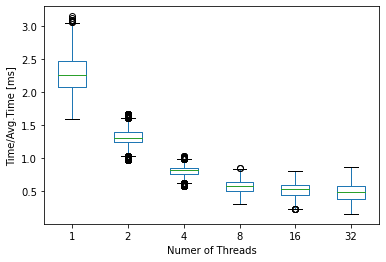

In [29]:
# Plot the box-plot regarding time
boxplot = remove_outlier(remove_outlier(remove_outlier(remove_outlier(remove_outlier(remove_outlier(summary_values_time, '1'), '2'),'4'),'8'),'16'),'32').boxplot(column=['1', '2', '4', '8', '16', '32'], grid=False,)  
boxplot.set_xlabel("Numer of Threads")
boxplot.set_ylabel("Time/Avg.Time [ms]")

### Sum of times

Text(0, 0.5, 'Sum of Time')

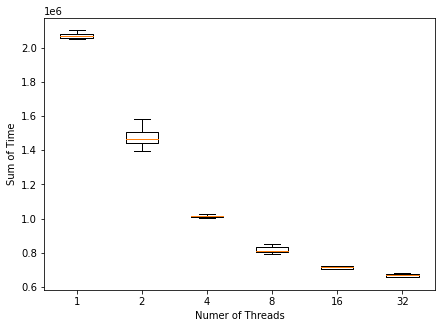

In [30]:
df_new = pd.read_csv ('outputWIndex.csv', sep=';')

time_sum = pd.DataFrame(columns=["1", "2", "4", "8", "16", "32"])

for i in range(1,81):
    time_sum.loc[len(time_sum.index)] = [df_new[(df_new.indexVal == i) & df_new.nThreads.eq(1)]['time'].sum().astype(int), 
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(2)]['time'].sum().astype(int),
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(4)]['time'].sum().astype(int),
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(8)]['time'].sum().astype(int),
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(16)]['time'].sum().astype(int),
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(32)]['time'].sum().astype(int)]

fig = plt.figure(figsize =(7, 5))
ax = fig.add_subplot(111)
ax.boxplot(time_sum)
ax.set
ax.set_xticklabels(nThreads)
ax.set_xlabel("Numer of Threads")
ax.set_ylabel("Sum of Time")

### Size

In [31]:
# Fill the size dataframe
summary_values_size['fileName'] = df.loc[df.nThreads.eq(32), 'fileName']

for n in nThreads:
    summary_values_size.loc[:,str(n)] = df[df.nThreads.eq(n)]['size'].to_numpy().tolist()

In [32]:
# Compute the average in order to scale the values
means = (summary_values_size['1'] + summary_values_size['2'] + summary_values_size['4'] + summary_values_size['8'] + summary_values_size['16'] + summary_values_size['32'])/6
summary_values_size['1'] = summary_values_size['1'] / means
summary_values_size['2'] = summary_values_size['2'] / means
summary_values_size['4'] = summary_values_size['4'] / means
summary_values_size['8'] = summary_values_size['8'] / means
summary_values_size['16'] = summary_values_size['16'] / means
summary_values_size['32'] = summary_values_size['32'] / means

Text(0, 0.5, 'Size/Avg.Size [Number of test cases]')

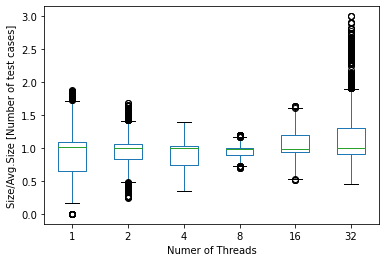

In [33]:
# Plot the box-plot regarding size
boxplot = remove_outlier(remove_outlier(remove_outlier(summary_values_size, '1'), '16'),'8').boxplot(column=['1', '2', '4', '8', '16', '32'], grid=False)  
boxplot.set_xlabel("Numer of Threads")
boxplot.set_ylabel("Size/Avg.Size [Number of test cases]")

### Sum of size

Text(0, 0.5, 'Sum of Size')

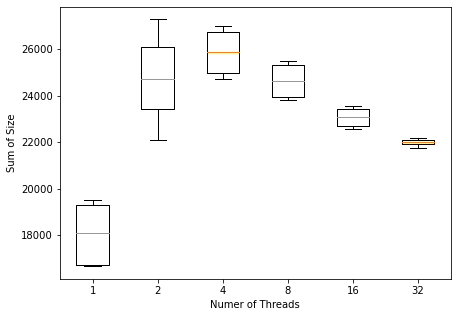

In [34]:
df_new = pd.read_csv ('outputWIndex.csv', sep=';')

size_sum = pd.DataFrame(columns=["1", "2", "4", "8", "16", "32"])
#timed_out = df_new[df_new['size'].eq(-1)]['fileName'].unique()

#df_new = df_new[~df_new.fileName.isin(timed_out)]

for i in range(1,81):
    size_sum.loc[len(size_sum.index)] = [df_new[(df_new.indexVal == i) & df_new.nThreads.eq(1)]['size'].sum().astype(int), 
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(2)]['size'].sum().astype(int),
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(4)]['size'].sum().astype(int),
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(8)]['size'].sum().astype(int),
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(16)]['size'].sum().astype(int),
                                        df_new[(df_new.indexVal == i) & df_new.nThreads.eq(32)]['size'].sum().astype(int)]

fig = plt.figure(figsize =(7, 5))
ax = fig.add_subplot(111)
ax.boxplot(size_sum)
ax.set
ax.set_xticklabels(nThreads)
ax.set_xlabel("Numer of Threads")
ax.set_ylabel("Sum of Size")


## RQ5: Comparison with pMEDICI

In [35]:
# Load the CSV files containing the results of the comparison
df = pd.read_csv ('tools_comparison/aggregated_best.csv', sep=',')
df_no_timeout = pd.read_csv ('tools_comparison/aggregated_best_no_timeouts.csv', sep=',')

### Number of timeouts

In [36]:
print("Kali timeouts: " + str(df[(df.TimeKali.eq(-1)) & (~df.ModelName.str.contains('NUMC'))].shape[0]))
print("pMedici timeouts: " + str(df[(df.TimePMedici.eq(-1)) & (~df.ModelName.str.contains('NUMC'))].shape[0]))

Kali timeouts: 87
pMedici timeouts: 9


### Impact on time - Excluding the timeouts and NUMC instances

In [37]:
data_kali = df_no_timeout.loc[(~df_no_timeout['ModelName'].str.contains('NUMC')),'TimeKali'].to_numpy()
data_pMedici = df_no_timeout.loc[(~df_no_timeout['ModelName'].str.contains('NUMC')),'TimePMedici'].to_numpy()
st.ttest_rel(a=data_kali, b=data_pMedici)

Ttest_relResult(statistic=6.808677086819604, pvalue=1.8526111257197028e-10)

In [38]:
print(np.mean(data_kali))
print(np.mean(data_pMedici))

22.11592592592593
7.155555555555554


### Impact on size - Excluding the timeouts and NUMC instances

In [39]:
data_kali = df_no_timeout.loc[(~df_no_timeout['ModelName'].str.contains('NUMC')),'SizeKali'].to_numpy()
data_pMedici = df_no_timeout.loc[(~df_no_timeout['ModelName'].str.contains('NUMC')),'SizePMedici'].to_numpy()
st.ttest_rel(a=data_kali, b=data_pMedici)

Ttest_relResult(statistic=7.3796878369445205, pvalue=7.988158293128475e-12)

In [40]:
print(np.mean(data_kali))
print(np.mean(data_pMedici))

800.895061728395
685.7530864197531


## RQ6: Comparison with ACTS

### Number of timeouts

In [41]:
print("Kali timeouts: " + str(df[df.TimeKali.eq(-1)].shape[0]))
print("ACTS timeouts: " + str(df[df.TimeActs.eq(-1)].shape[0]))

Kali timeouts: 127
ACTS timeouts: 0


### Impact on time - Excluding the timeouts 

In [42]:
data_kali = df_no_timeout['TimeKali'].to_numpy()
data_acts = df_no_timeout['TimeActs'].to_numpy()
st.ttest_rel(a=data_kali, b=data_acts)

Ttest_relResult(statistic=6.39915296499391, pvalue=1.4462260681109546e-09)

In [43]:
print(np.mean(data_kali))
print(np.mean(data_acts))

24.424302325581394
2.392558139534884


### Impact on size - Excluding the timeouts

In [44]:
data_kali = df_no_timeout['SizeKali'].to_numpy()
data_acts = df_no_timeout['SizeActs'].to_numpy()
st.ttest_rel(a=data_kali, b=data_acts)

Ttest_relResult(statistic=6.577202483462013, pvalue=5.605217689688568e-10)

In [45]:
print(np.mean(data_kali))
print(np.mean(data_acts))

950.2848837209302
604.8662790697674
